In [1]:
import os
%matplotlib inline
%pylab inline
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from statsmodels.tsa import stattools #time series analysis module
import seaborn as sns  
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


## Getting current working directory 

In [2]:
os.getcwd()

'C:\\Users\\Rishabh Gupta\\Desktop\\Social Cops'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'Challenge 1.ipynb',
 'CMO_MSP_Mandi.csv',
 'Documentation.docx',
 'Documentation.pdf',
 'Final file after removing outliers.csv',
 'Image.PNG',
 'Monthly_data_cmo.csv',
 '~$cumentation.docx',
 '~WRL0840.tmp']

# Load the data

In [4]:
CMO_MSP_Mandi = pd.read_csv('CMO_MSP_Mandi.csv') 

In [5]:
CMO_MSP_Mandi.head() 

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


In [6]:
Monthly_data= pd.read_csv("Monthly_data_cmo.csv")

In [7]:
Monthly_data.head() 

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [8]:
Monthly_data.dtypes

APMC               object
Commodity          object
Year                int64
Month              object
arrivals_in_qtl     int64
min_price           int64
max_price           int64
modal_price         int64
date               object
district_name      object
state_name         object
dtype: object

In [9]:
Monthly_data.columns

Index(['APMC', 'Commodity', 'Year', 'Month', 'arrivals_in_qtl', 'min_price',
       'max_price', 'modal_price', 'date', 'district_name', 'state_name'],
      dtype='object')

# Convert date from object in to data time format= '%d-%m-%Y %H:%M'

In [10]:
Monthly_data['Year_Month'] = pd.to_datetime(Monthly_data['date'], format= '%Y-%m' )

In [11]:
Monthly_data['Year_Month'].min(), Monthly_data['Year_Month'].max()

(Timestamp('2014-09-01 00:00:00'), Timestamp('2016-11-01 00:00:00'))

In [12]:
Monthly_data.index = Monthly_data['Year_Month'] # make date index

In [13]:
Monthly_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,Year_Month
Year_Month,,,,,,,,,,,,
2015-04-01,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra,2015-04-01
2016-04-01,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra,2016-04-01
2015-04-01,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra,2015-04-01
2016-04-01,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra,2016-04-01
2015-04-01,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra,2015-04-01


In [14]:
Monthly_data_2 = Monthly_data.drop(['Year','Month','Year_Month'],1)

In [15]:
Monthly_data_2.head()

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
Year_Month,,,,,,,,,
2015-04-01,Ahmednagar,Bajri,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
2016-04-01,Ahmednagar,Bajri,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2015-04-01,Ahmednagar,Wheat(Husked),1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
2016-04-01,Ahmednagar,Wheat(Husked),387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
2015-04-01,Ahmednagar,Sorgum(Jawar),3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [16]:
Monthly_data_2.dtypes

APMC               object
Commodity          object
arrivals_in_qtl     int64
min_price           int64
max_price           int64
modal_price         int64
date               object
district_name      object
state_name         object
dtype: object

In [17]:
type(Monthly_data_2.index)

pandas.core.indexes.datetimes.DatetimeIndex

During conversion of date in to time stamp formate, data is converted in Y-M-D, but in day is not given so it is selected 1st day of every month by default.
we have to remove day becuase our orginal data is in Y-M

In [18]:
Monthly_data_2 = Monthly_data_2.to_period(freq='M')

In [19]:
Monthly_data_2.head()

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
Year_Month,,,,,,,,,
2015-04,Ahmednagar,Bajri,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
2016-04,Ahmednagar,Bajri,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2015-04,Ahmednagar,Wheat(Husked),1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
2016-04,Ahmednagar,Wheat(Husked),387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
2015-04,Ahmednagar,Sorgum(Jawar),3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


# Exploratory Analysis for CMO_MSP_Mandi Data

In [20]:
CMO_MSP_Mandi.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


In [21]:
CMO_MSP_Mandi.shape 

(155, 5)

In [22]:
CMO_MSP_Mandi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
commodity     155 non-null object
year          155 non-null int64
Type          155 non-null object
msprice       145 non-null float64
msp_filter    155 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.1+ KB


In [23]:
CMO_MSP_Mandi.isnull().sum()

commodity      0
year           0
Type           0
msprice       10
msp_filter     0
dtype: int64

# msprice has 10 missing values

In [24]:
CMO_MSP_Mandi.describe(include = 'all')

,commodity,year,Type,msprice,msp_filter
count,155,155.000000,155,145.000000,155.0
unique,32,NaN,3,NaN,NaN
top,Jute_Yellow,NaN,Kharif Crops,NaN,NaN
freq,5,NaN,90,NaN,NaN
mean,NaN,2014.000000,NaN,2822.448276,1.0
std,NaN,1.418798,NaN,1441.725928,0.0
min,NaN,2012.000000,NaN,170.000000,1.0
25%,NaN,2013.000000,NaN,1470.000000,1.0
50%,NaN,2014.000000,NaN,2970.000000,1.0
75%,NaN,2015.000000,NaN,4000.000000,1.0


In [25]:
CMO_MSP_Mandi = CMO_MSP_Mandi.drop('msp_filter', axis=1)

### msprice has 10 missing values in CMO_MSP_Mandi data, which will impute from Monthly data.

### We have to check the outliers in CMO_MSP_Mandi data set, if outliers are present in data, then we have to remove it.

For outliers detection we mostly use boxplot, where points lying at whiskers are called ouliers.

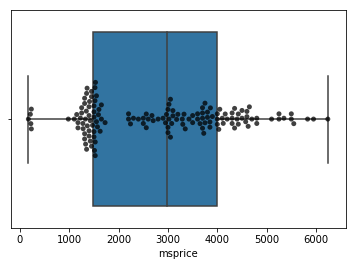

In [26]:
# Boxplot of msprices
t = sns.boxplot(CMO_MSP_Mandi['msprice'], whis = 1.5)
bplot = sns.swarmplot(CMO_MSP_Mandi['msprice'], color='black', alpha = 0.75)

C:\Users\Rishabh Gupta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


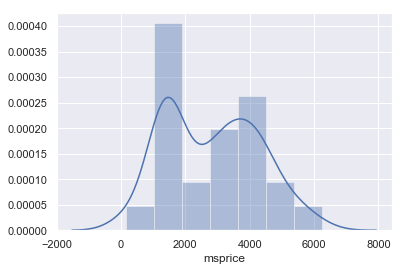

In [27]:
# Histogram of msprices.
import seaborn as sns, numpy as np
sns.set(); np.random.seed(0)
ax = sns.distplot(CMO_MSP_Mandi['msprice'].dropna())

#### The boxplot below suggests that there are no outliers in "msprice" vs "type of crop"

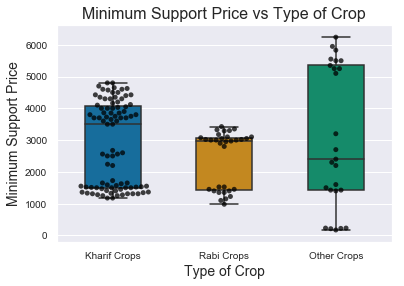

In [28]:
# boxplot  of msprice and Crops's type

bplot = sns.boxplot(x="Type", y="msprice", data=CMO_MSP_Mandi, width = 0.5, palette = 'colorblind', whis =1.5) #For outlier detection
# add stripplot to boxplot with Seaborn
bplot = sns.swarmplot(y='msprice', x ='Type', data = CMO_MSP_Mandi, color='black', alpha = 0.75)

bplot.axes.set_title("Minimum Support Price vs Type of Crop",
                            fontsize=16)
 
bplot.set_xlabel("Type of Crop", 
                        fontsize=14)
 
bplot.set_ylabel("Minimum Support Price",
                        fontsize=14)
 
bplot.tick_params(labelsize=10)


### Bar plot

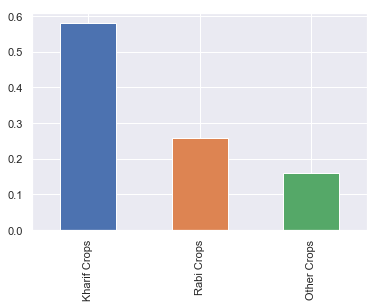

In [29]:
(CMO_MSP_Mandi['Type'].value_counts()/len(CMO_MSP_Mandi)).plot.bar() 

### Above diagram is showing Kharif crops are more than than Rabi crops and others crops

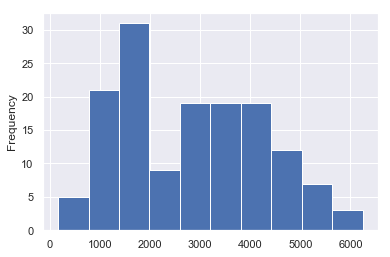

In [30]:
# Check the distribution of msprice

# Histogram Plot

CMO_MSP_Mandi['msprice'].plot.hist()

# We can not use boxplot for identifying the outliers because the msprice don't have normal / gaussian distribution. Box plot is apply only where distribution is normal. 

In [31]:
CMO_MSP_Mandi.sort_values(by='msprice', ascending=True).head()

,commodity,year,Type,msprice
30,SUGAR-CANE,2012,Other Crops,170.0
61,SUGAR-CANE,2013,Other Crops,210.0
92,SUGAR-CANE,2014,Other Crops,220.0
154,SUGARCANE,2016,Other Crops,230.0
123,SUGAR-CANE,2015,Other Crops,230.0


In [32]:
CMO_MSP_Mandi.sort_values(by='msprice', ascending=False).head()

,commodity,year,Type,msprice
151,Copra (Ball)_Yellow,2016,Other Crops,6240.0
150,Copra (Milling)_Yellow,2016,Other Crops,5950.0
120,Copra (Ball)_Yellow,2015,Other Crops,5830.0
119,Copra (Milling)_Yellow,2015,Other Crops,5550.0
89,Copra (Ball)_Yellow,2014,Other Crops,5500.0


In above msprice value, sugarcane has 170 value( sort in ascending order ) and copra has 6240 values ( sort in descending order). It's showing diffrent crops have diffrent value. There are larger difference between in thier crops's values, so means, msprice can't be have normal distribution. So we can't apply boxplot method for identifying the outliers.


In [33]:
Monthly_data_2.head()

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
Year_Month,,,,,,,,,
2015-04,Ahmednagar,Bajri,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
2016-04,Ahmednagar,Bajri,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2015-04,Ahmednagar,Wheat(Husked),1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
2016-04,Ahmednagar,Wheat(Husked),387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
2015-04,Ahmednagar,Sorgum(Jawar),3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [34]:
Monthly_data_2.isnull().sum()

APMC               0
Commodity          0
arrivals_in_qtl    0
min_price          0
max_price          0
modal_price        0
date               0
district_name      0
state_name         0
dtype: int64

# No missing value in Monthly_data_2

In [35]:
Monthly_data_2.describe()

,arrivals_in_qtl,min_price,max_price,modal_price
count,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


### In above table the min value of min price, max price and modal price is zero, which can't be possbile in real situation because price of any thing can't be zero. It might be typing error.

In [36]:
# Z scroe of ouliers detection
from scipy.stats import zscore

In [37]:
pd.Series(zscore(Monthly_data_2['max_price'])).corr(pd.Series(zscore(Monthly_data_2['min_price']))) 

0.11729048325781062

In [38]:
Monthly_data_2 ['Commodity'] = Monthly_data_2 ['Commodity'].str.lower()

# Removing the observation where min, max and modals are having zero value

In [39]:
Monthly_data_2  = Monthly_data_2 [(Monthly_data_2 ['min_price'] != 0) | (Monthly_data_2 ['max_price'] != 0) 
                 | (Monthly_data_2 ['modal_price'] != 0) ]

# Correlation of min and max price
####  How they are impacting to eachother

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


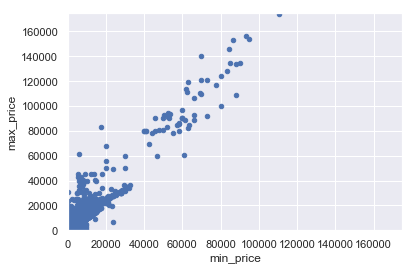

In [40]:
#scatter plot b/w min and max
ax = Monthly_data_2 .sort_values(by=['Commodity']).plot.scatter(x = 'min_price', y = 'max_price')
ax.set_xlim(0, 175000)
ax.set_ylim(0, 175000)
plt.show()

#### Above scatter plot is explaining min price, max price  are directly proportional to each other.

# Correlation of min price and modal price
####  How they are impacting to eachother

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(0, 175000)

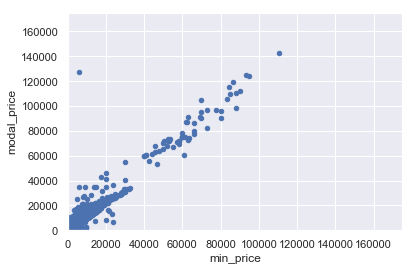

In [41]:
ax = Monthly_data_2 .sort_values(by=['Commodity']).plot.scatter(x = 'min_price', y = 'modal_price')
ax.set_xlim(0, 175000)
ax.set_ylim(0, 175000)

### Mean Value imputation

In [42]:
#Missing values and thier commodity
CMO_MSP_Mandi_Missing_Values = CMO_MSP_Mandi .loc[CMO_MSP_Mandi ['msprice'].isnull(), 'commodity'] 

In [43]:
CMO_MSP_Mandi_Missing_Values

107     Soyabean_Black
138     Soyabean_Black
142      WHEAT(HUSKED)
143    WHEAT(UNHUSKED)
144              BARLI
145        Gram_Yellow
146       Masur_Yellow
147            MUSTARD
148          SAFFLOWER
149       Toria_Yellow
Name: commodity, dtype: object

In [44]:
dict = {}
for group, frame in CMO_MSP_Mandi [CMO_MSP_Mandi ['commodity'].isin(CMO_MSP_Mandi_Missing_Values.tolist())].groupby('commodity'):
    dict[group] = frame['msprice'].mean()

In [45]:
# Imputing the mean value of commodities of remaining years in to missing values of the commodities.

In [46]:
dict 
for key, value in dict.items():
    CMO_MSP_Mandi .loc[(CMO_MSP_Mandi['commodity'] == key) & (CMO_MSP_Mandi ['msprice'].isnull()), 'msprice']  = value

In [47]:
CMO_MSP_Mandi_Missing_Values.isnull().sum()

0

In [48]:
CMO_MSP_Mandi.isnull().sum()

commodity    0
year         0
Type         0
msprice      0
dtype: int64

####                            Above value is explaining, now there is no missing values in CMO_MSP_Mandi data. 

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 

## DBSCAN : For identifying outliers 

For more information :
https://medium.com/@elutins/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818

Compulsory  reading : https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [49]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [50]:
CMO_MSP_Mandi .head()

,commodity,year,Type,msprice
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0
2,Jowar_Hybrid,2012,Kharif Crops,1500.0
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0
4,BAJRI,2012,Kharif Crops,1175.0


In [51]:
type(CMO_MSP_Mandi )

pandas.core.frame.DataFrame

In [52]:
CMO_MSP_Mandi =pd.DataFrame(CMO_MSP_Mandi )

In [53]:
type(CMO_MSP_Mandi )

pandas.core.frame.DataFrame

In [54]:
X = CMO_MSP_Mandi ['msprice'].values.reshape(155, -1) # arrnage in decrasing order by indexing

In [55]:
X.shape

(155, 1)

In [56]:
X

array([[1250.  ],
       [1280.  ],
       [1500.  ],
       [1520.  ],
       [1175.  ],
       [1175.  ],
       [1500.  ],
       [3850.  ],
       [4400.  ],
       [4300.  ],
       [3600.  ],
       [3900.  ],
       [3700.  ],
       [3700.  ],
       [2200.  ],
       [2240.  ],
       [4200.  ],
       [3500.  ],
       [1350.  ],
       [1350.  ],
       [ 980.  ],
       [3000.  ],
       [2900.  ],
       [3000.  ],
       [2800.  ],
       [2970.  ],
       [5100.  ],
       [5350.  ],
       [1400.  ],
       [2200.  ],
       [ 170.  ],
       [1310.  ],
       [1345.  ],
       [1500.  ],
       [1520.  ],
       [1310.  ],
       [1310.  ],
       [1500.  ],
       [4300.  ],
       [4500.  ],
       [4300.  ],
       [3700.  ],
       [4000.  ],
       [4000.  ],
       [3700.  ],
       [2500.  ],
       [2560.  ],
       [4500.  ],
       [3500.  ],
       [1400.  ],
       [1400.  ],
       [1100.  ],
       [3100.  ],
       [2950.  ],
       [3050.  ],
       [30

In [57]:
CMO_MSP_Mandi .head()

,commodity,year,Type,msprice
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0
2,Jowar_Hybrid,2012,Kharif Crops,1500.0
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0
4,BAJRI,2012,Kharif Crops,1175.0


# Using One-hot encoding method under DBSCAN
for more info: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [58]:
from IPython.display import Image

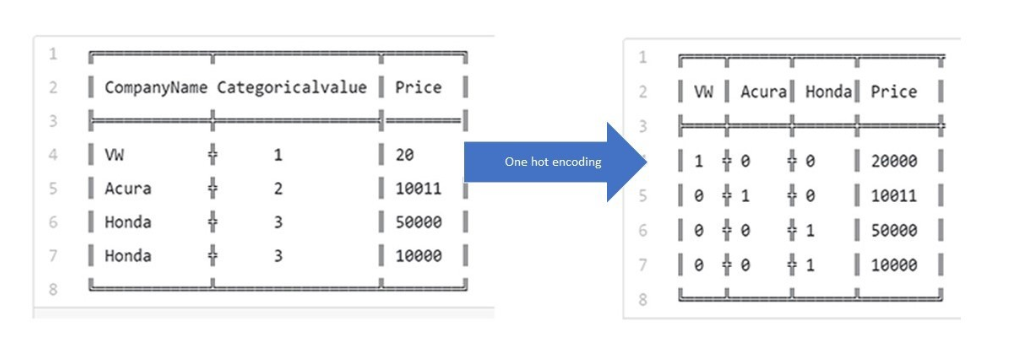

In [59]:
# Image of One-hot encoding method
Image('Image.PNG')

In [60]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
CMO_MSP_Mandi_new = CMO_MSP_Mandi.copy()
CMO_MSP_Mandi_new.loc[:,'year'] = le.fit_transform(CMO_MSP_Mandi.loc[:, 'year'])
CMO_MSP_Mandi_new.loc[:, 'Type'] = le.fit_transform(CMO_MSP_Mandi.loc[:, 'Type'])
    
ohe = OneHotEncoder()
X = ohe.fit_transform(CMO_MSP_Mandi_new[['year', 'Type']]).toarray()
b = CMO_MSP_Mandi_new['msprice'].values.reshape(-1, 1)
X = np.concatenate((X, b), axis=1)

C:\Users\Rishabh Gupta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [61]:
X.shape # Five columns for year one hot encoded, three columns for the crop type, and one for the price.

(155, 9)

In [62]:
# We must scale and standardize our data
X = StandardScaler().fit_transform(X)
# #############################################################################
# Compute DBSCAN
dbscan = DBSCAN(eps=3, min_samples= 4)
model = dbscan.fit(X)

labels = model.labels_

# identifying the core samples.
core_samples = np.zeros_like(labels, dtype = bool)

core_samples[dbscan.core_sample_indices_] = True
print(core_samples)
 
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

### This removed the outliers in df1
CMO_MSP_Mandi_new = CMO_MSP_Mandi[core_samples]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False  True False]
Estimated number of clusters: 15
Silhouette Coefficient:

In [63]:
CMO_MSP_Mandi.shape ### In total 9 outliers were removed.

(155, 4)

In [64]:
CMO_MSP_Mandi_new.shape

(146, 4)

In [65]:
(1 - 146/155) * 100 # 5% instances were removed, thus there is no problem in filtering out.

5.8064516129032295

In [66]:
CMO_MSP_Mandi = CMO_MSP_Mandi_new

# Now we have removed all outliers
## write / save CMO_MSP_Mandi file

In [67]:
CMO_MSP_Mandi.to_csv('Final file after removing outliers.csv') 

### Time Series Analysis

In [68]:
Monthly_data_2.head()

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
Year_Month,,,,,,,,,
2015-04,Ahmednagar,bajri,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
2016-04,Ahmednagar,bajri,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2015-04,Ahmednagar,wheat(husked),1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
2016-04,Ahmednagar,wheat(husked),387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
2015-04,Ahmednagar,sorgum(jawar),3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


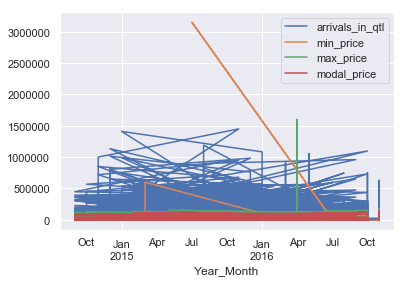

In [69]:
Monthly_data_2.plot()

In [70]:
len(Monthly_data_2['min_price']) 

62429

In [71]:
CMO_MSP_Mandi.head()

,commodity,year,Type,msprice
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0
2,Jowar_Hybrid,2012,Kharif Crops,1500.0
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0
4,BAJRI,2012,Kharif Crops,1175.0


### Check periodicity/seasonality 

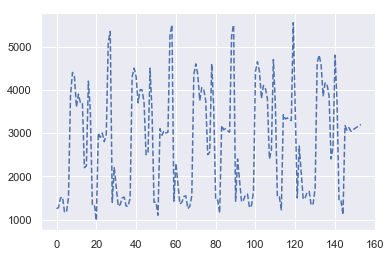

In [72]:
CMO_MSP_Mandi['msprice'].plot(style = 'b--')  
#'--'   # dashed line with default color
#'b'	blue

Above graph is not showing any trend with constant mean and Standard deviation. 
Trend and seasonality both are different.

## Check Autocorrelation in min price

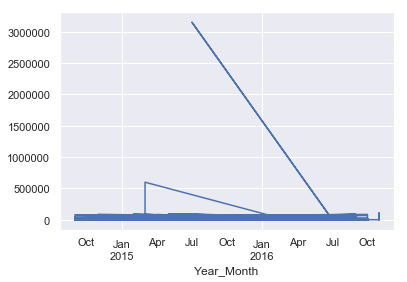

In [73]:
Monthly_data_2 ['min_price'].plot()

# What is a stationary time series?

There are three basic criterion for a series to be classified as stationary series :

The mean of the time series should not be a function of time. It should be constant.

The variance of the time series should not be a function of time.

THe covariance of the ith term and the (i+m)th term should not be a function of time.

# Why do we have to make the time series stationary?

We make the series stationary to make the variables independent. Variables can be dependent in various ways, but can only be independent in one way. So, we will get more information when they are independent. Hence the time series must be stationary.
Stationary time series has a constant mean, a constant variance and a constant autocorrelation.


If the time series is not stationary, firstly we have to make it stationary. For doing so, we need to remove the trend and seasonality from the data. To learn more about stationarity you can refer this article: https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

C:\Users\Rishabh Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


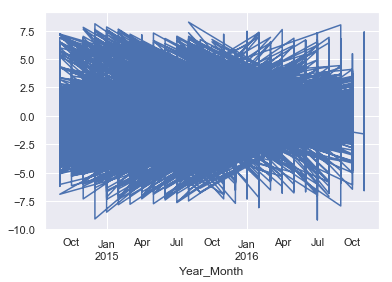

In [74]:
log_air_passengers = np.log(Monthly_data_2 ['min_price'])
log_air_passengers_diff = log_air_passengers - log_air_passengers.shift()
log_air_passengers_diff.plot()

In above diagram, log difference is trying to get stationarity time series

### Differencing can just help detrend and also by taking some moving average and subtract that moving average out.
### for removing the seasonality, we will use a locally weighted scatterplot smoothin method. 

# Check trend in data

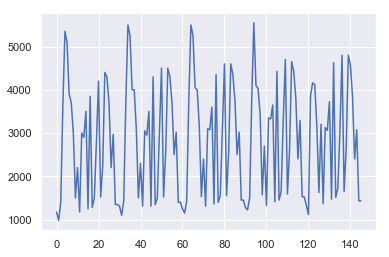

In [75]:
CMO_MSP_Mandi.sort_values(['year', 'commodity']).reset_index()['msprice'].plot() 

Above graph looks increasing just slightly year on year.
It seems/looks to additive seasonality in data. 

# Differencing can just help detrend and also by taking some moving average and subtract that moving average out.

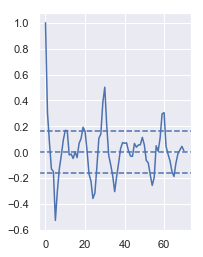

In [76]:
acf_result = stattools.acf(CMO_MSP_Mandi.sort_values(['year', 'commodity']).reset_index()['msprice'], nlags=70 )
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y = 0, linestyle = '--')
plt.axhline(y = -1.96/np.sqrt(len(CMO_MSP_Mandi['msprice'])), linestyle = '--')
plt.axhline(y = 1.96/np.sqrt(len(CMO_MSP_Mandi['msprice'])), linestyle = '--')

### In the above plot of autocorrelation, we can see a massive spike at nearly 32, so that gives us internal structure, that the minimum support prices are highly correlated to each other, for each crop.
### High self-correlation at 32, which can be inferred to each crop getting repeated after 32 by year and with its price(since 32 unique values)

In [77]:
CMO_MSP_Mandi.head()

,commodity,year,Type,msprice
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0
2,Jowar_Hybrid,2012,Kharif Crops,1500.0
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0
4,BAJRI,2012,Kharif Crops,1175.0


# Stationarity Check
We use Dickey Fuller test to check the stationarity of the series.

The intuition behind this test is that it determines how strongly a time series is defined by a trend.

The null hypothesis of the test is that time series is not stationary (has some time-dependent structure).

The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

We interpret this result using the Test Statistics and critical value. If the Test Statistics is smaller than critical value, it suggests we reject the null hypothesis (stationary), otherwise a greater Test Statistics suggests we accept the null hypothesis (non-stationary).

Let’s make a function which we can use to calculate the results of Dickey-Fuller test.

### Dickey-Fuller test on  CMO_MSP_Mandi

H0 =  data is stationary

H1= data is not stationary

If p-value <= 0.05: 

Reject the null hypothesis (H0),that means, the data is stationary. 

In [78]:
from statsmodels.tsa.stattools import adfuller

In [79]:
stattools.adfuller(CMO_MSP_Mandi.sort_values(['year', 'commodity'])['msprice'])

(-6.614935619860213,
 6.241527859686515e-09,
 12,
 133,
 {'1%': -3.480500383888377,
  '5%': -2.8835279559405045,
  '10%': -2.578495716547007},
 2191.519361071064)

In above Calculation:

        p-value < 0.05:
        
Thus we reject the null hypothesis and conclude that df1 is stationary.

### Check the correlation of mean value for min price,  max price and modal price. 

In [80]:
Monthly_data_2 = Monthly_data_2.sort_index()

In [81]:
Monthly_data_2.head()

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
Year_Month,,,,,,,,,
2014-09,Kurdwadi,sorgum(jawar),454,1353,2610,1981,2014-09,Solapur,Maharashtra
2014-09,Satara,ladies finger,128,2435,3261,2848,2014-09,Satara,Maharashtra
2014-09,Satara,potato,2988,2175,2488,2331,2014-09,Satara,Maharashtra
2014-09,Satara,ginger (fresh),199,3438,4813,4125,2014-09,Satara,Maharashtra
2014-09,Satara,ground nut pods (dry),1,3000,4000,3500,2014-09,Satara,Maharashtra


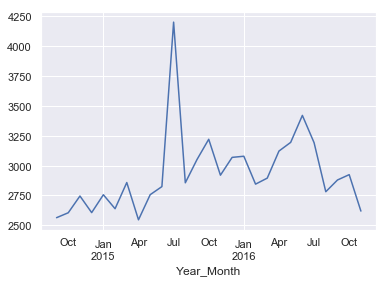

In [82]:
Monthly_data_2['min_price'].groupby(level = 0).mean().plot()

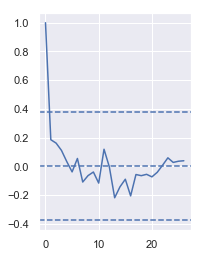

In [83]:
acf_result = stattools.acf(Monthly_data_2['min_price'].groupby(level = 0).mean(), nlags=27 )
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y = 0, linestyle = '--')
plt.axhline(y = -1.96/np.sqrt(len(Monthly_data_2['min_price'].groupby(level = 0).mean())), linestyle = '--')
plt.axhline(y = 1.96/np.sqrt(len(Monthly_data_2['min_price'].groupby(level = 0).mean())), linestyle = '--')

### Looking above graph,  it looks like for a lag of 1 there is repetition, since I'm taking all the crops price average values for months. Thus, monthly correlation can be there.

### Detrending data by differencing by min and max

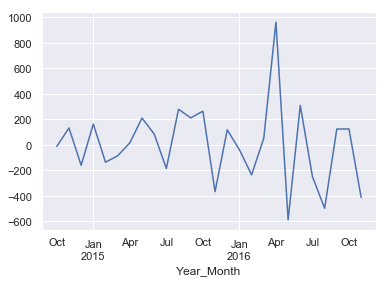

In [84]:
(Monthly_data_2['max_price'].groupby(level = 0).mean() - Monthly_data_2['max_price'].groupby(level = 0).mean().shift()).plot()

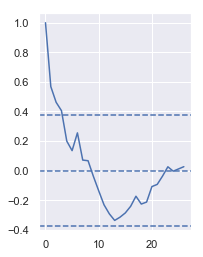

In [85]:
acf_result = stattools.acf(Monthly_data_2['max_price'].groupby(level = 0).mean(), nlags=27 )
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y = 0, linestyle = '--')
plt.axhline(y = -1.96/np.sqrt(len(Monthly_data_2['max_price'].groupby(level = 0).mean())), linestyle = '--')
plt.axhline(y = 1.96/np.sqrt(len(Monthly_data_2['max_price'].groupby(level = 0).mean())), linestyle = '--')

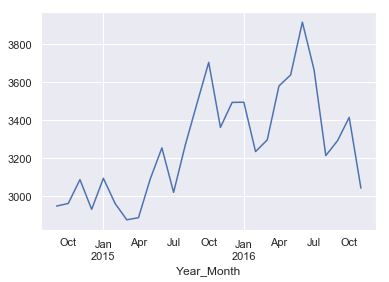

In [86]:
Monthly_data_2['modal_price'].groupby(level = 0).mean().plot()

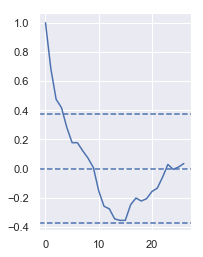

In [87]:
acf_result = stattools.acf(Monthly_data_2['modal_price'].groupby(level = 0).mean(), nlags=27 )
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y = 0, linestyle = '--')
plt.axhline(y = -1.96/np.sqrt(len(Monthly_data_2['modal_price'].groupby(level = 0).mean())), linestyle = '--')
plt.axhline(y = 1.96/np.sqrt(len(Monthly_data_2['modal_price'].groupby(level = 0).mean())), linestyle = '--')

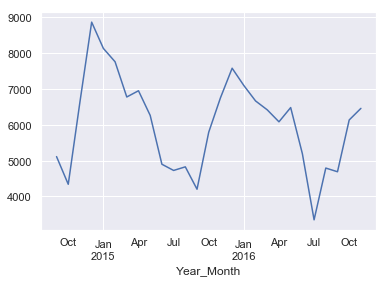

In [88]:
Monthly_data_2['arrivals_in_qtl'].groupby(level = 0).mean().plot()

C:\Users\Rishabh Gupta\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\Rishabh Gupta\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


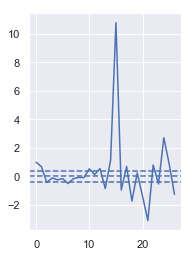

In [89]:
acf_result = stattools.pacf(Monthly_data_2['arrivals_in_qtl'].groupby(level = 0).mean(), nlags=27 )
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y = 0, linestyle = '--')
plt.axhline(y = -1.96/np.sqrt(len(Monthly_data_2['arrivals_in_qtl'].groupby(level = 0).mean())), linestyle = '--')
plt.axhline(y = 1.96/np.sqrt(len(Monthly_data_2['arrivals_in_qtl'].groupby(level = 0).mean())), linestyle = '--')

# Removing Seasonality

By seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).

Seasonality is always of a fixed and known period.

### How to remove seasonality/de-seasonalize
- -  Simplest: Average de-trended values for specific season
- -  More Common: use 'loess' method (locally weighted scatterplot smoothing)
    -  Window of specified width is placed over the data
    -  A weighted regression line or curve is fitted to the data, with points closest to the center of the curve having greatest weight.
    -  Weighting is reduced for points further away from regression line/curve and calculation is rerun several times.
    -  This yield one point on loess curve
    -  Helps reduce impact of outlier points.
    -  Computationally taxing

### Detrended max_price

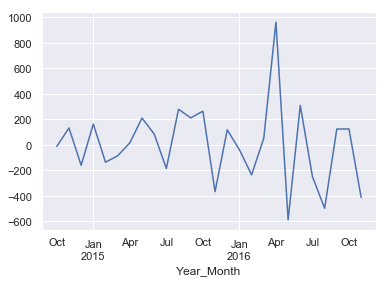

In [90]:
(Monthly_data_2['max_price'].groupby(level = 0).mean() - Monthly_data_2['max_price'].groupby(level = 0).mean().shift()).plot()

### Rolling Windows and Expanding Windows

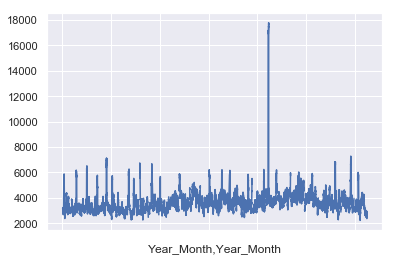

In [91]:
r = Monthly_data_2['max_price'].groupby(level = 0).rolling(window=120)
r.mean().plot()

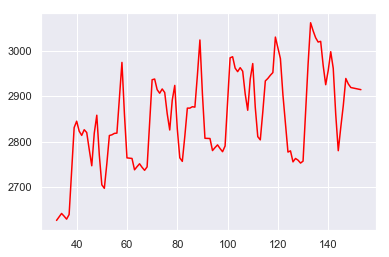

In [92]:
r = CMO_MSP_Mandi.rolling(window = 32)
r['msprice'].mean().plot(color='red')

C:\Users\Rishabh Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


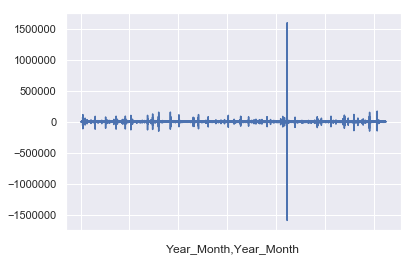

In [93]:
r = Monthly_data_2['max_price'].groupby(level = 0).rolling(window=120).apply(lambda x : x[1] - x[2])
r.plot()

### Checking expanding windows

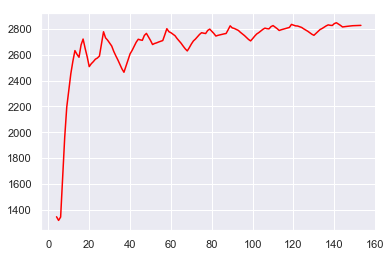

In [94]:
CMO_MSP_Mandi.expanding(min_periods= 5)['msprice'].mean().plot(color = 'red')

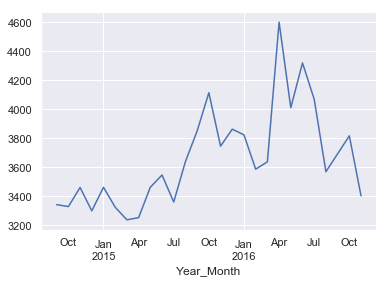

In [95]:
Monthly_data_2['max_price'].groupby(level = 0).mean().plot()

### In above graph of max price, max price is trying to get a linear trend line by year of year.
### For better linear trend, we can remove fluctuations, after removing fluctuations we will get a good linear trend definitely. 

Year_Month
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: A-DEC, Name: max_price, dtype: object

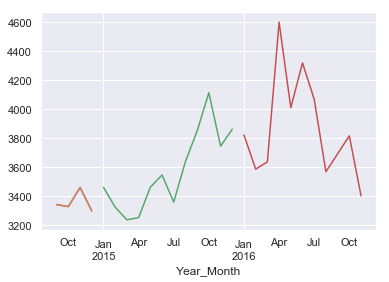

In [96]:
Monthly_data_2['max_price'].groupby(level = 0).mean().resample('A').plot()

### Close to a linear trend for df1 too!

In [97]:
CMO_MSP_Mandi = CMO_MSP_Mandi.set_index('year')
CMO_MSP_Mandi.index = pd.to_datetime(CMO_MSP_Mandi.index, format='%Y').to_period('A')

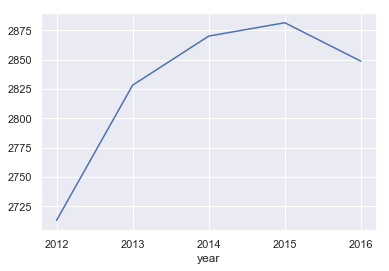

In [98]:
CMO_MSP_Mandi.groupby(level= 0)['msprice'].mean().plot()

### Checking Seasonal Trend in the data

In [99]:
CMO_MSP_Mandi_Missing_Values = pd.DataFrame(Monthly_data_2.groupby(level = 0)['max_price'].agg('median'))

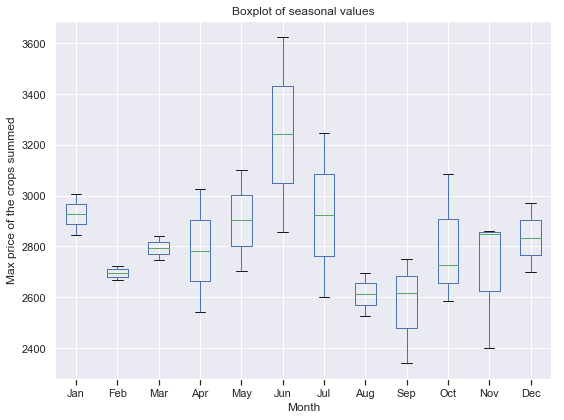

In [100]:
CMO_MSP_Mandi_Missing_Values['Month'] = CMO_MSP_Mandi_Missing_Values.index.strftime('%b')
CMO_MSP_Mandi_Missing_Values['Year'] = CMO_MSP_Mandi_Missing_Values.index.year

CMO_MSP_Mandi_Missing_Values_piv = CMO_MSP_Mandi_Missing_Values.pivot(index= 'Year', columns = 'Month', values = 'max_price')

# put the months in order
month_names = pd.date_range(start='2016-01-01', periods=12, freq='MS').strftime('%b')
CMO_MSP_Mandi_Missing_Values_piv = CMO_MSP_Mandi_Missing_Values_piv.reindex(columns=month_names)

# plot it
fig, ax = plt.subplots(figsize=(8, 6))
CMO_MSP_Mandi_Missing_Values_piv.plot(ax=ax, kind='box');

ax.set_xlabel('Month');
ax.set_ylabel('Max price of the crops summed');
ax.set_title('Boxplot of seasonal values');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();

In above boxplot, it seems, median price of the crops is high for June.

In [101]:
CMO_MSP_Mandi_Missing_Values_piv #pivot table

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2617.0,2586.5,2850.0,2700.0
2015,2847.0,2724.0,2748.0,2541.0,2703.0,2859.0,2600.0,2697.5,2750.0,3087.5,2862.0,2970.0
2016,3008.0,2667.0,2842.0,3027.0,3102.0,3625.0,3248.0,2525.5,2341.0,2726.0,2400.0,NaN


In [102]:
CMO_MSP_Mandi_Missing_Values  = Monthly_data_2.groupby(level = 0)[['max_price', 'min_price', 'modal_price']].agg('mean')
CMO_MSP_Mandi_Missing_Values .index = CMO_MSP_Mandi_Missing_Values .index.to_timestamp()

### Trends , Seasonality, Residual and Observed

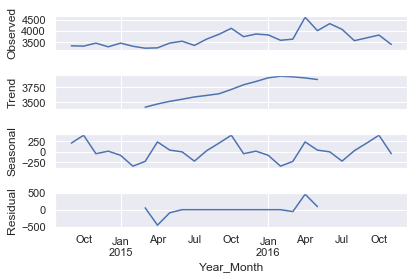

In [103]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(CMO_MSP_Mandi_Missing_Values['max_price'])
resplot = res.plot()

#### For max_price

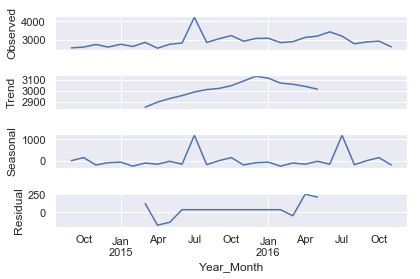

In [104]:
res = sm.tsa.seasonal_decompose(CMO_MSP_Mandi_Missing_Values['min_price'])
resplot = res.plot()

#### For min_price

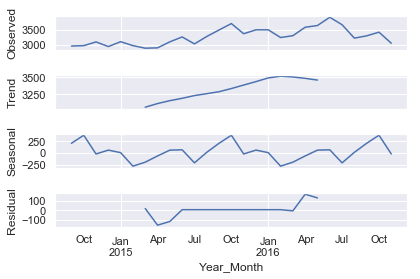

In [105]:
res = sm.tsa.seasonal_decompose(CMO_MSP_Mandi_Missing_Values['modal_price'])
resplot = res.plot()

# Objective 2.1
### Detect seasonality type (multiplicative or additive) for each cluster of APMC and commodities

In [106]:
Monthly_data_2['Commodity'] = Monthly_data_2['Commodity'].str.lower()

### Each cluster of APMC

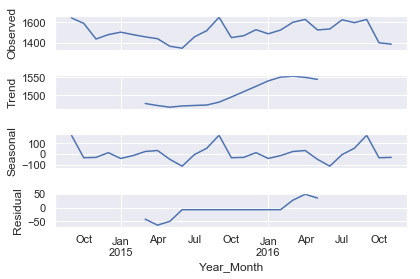

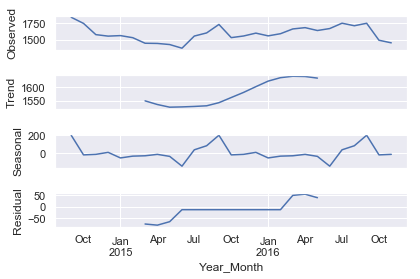

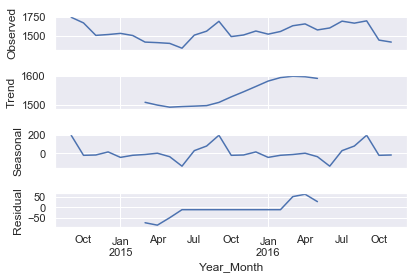

In [107]:
for group, frame in Monthly_data_2.reset_index().groupby('APMC'):
    frame.index = frame['Year_Month']
    frame.index = frame.index.to_timestamp()

    res = sm.tsa.seasonal_decompose(frame.groupby(level = 0)['min_price'].agg('mean'))
    resplot = res.plot()
    res = sm.tsa.seasonal_decompose(frame.groupby(level = 0)['max_price'].agg('mean'))
    resplot = res.plot()
    res = sm.tsa.seasonal_decompose(frame.groupby(level = 0)['modal_price'].agg('mean'))
    resplot = res.plot()
    break

Above graph seems to be additive/multiplicative.

# Objective 3
### Compare prices in APMC/Mandi with MSP(Minimum Support Price)- raw and deseasonlized

In [108]:
dict = {}
CMO_MSP_Mandi['commodity'] = CMO_MSP_Mandi['commodity'].str.lower() # Working with text data, lower() method on str object
for group, frame in CMO_MSP_Mandi.groupby('commodity'):
    dict[group] = frame['msprice'].mean()

In [109]:
dict

{'bajri': 1268.0,
 'barli': 1113.75,
 'coconut': 1437.5,
 'copra (ball)_yellow': 5450.0,
 'copra (milling)_yellow': 5287.5,
 'cotton': 3742.0,
 'cotton_long staple': 4042.0,
 'gr.nut kernels': 3970.0,
 'gram_yellow': 3175.0,
 'jowar_hybrid': 1545.0,
 'jute_yellow': 2560.0,
 'maize': 1297.0,
 'masur_yellow': 3062.5,
 'mustard': 3125.0,
 'niger-seed': 3595.0,
 'paddy-unhusked': 1360.0,
 'pigeon pea (tur)': 4310.0,
 'ragi_maldandi': 1585.0,
 'rice(paddy-hus)': 1397.0,
 'safflower': 3037.5,
 'sesamum': 4560.0,
 'sorgum(jawar)': 1566.0,
 'soyabean': 2527.0,
 'soyabean_black': 2400.0,
 'spilt gerrn gram': 4590.0,
 'split black gram': 4390.0,
 'sunflower': 3760.0,
 'toria_yellow': 3075.0,
 'wheat(husked)': 1431.25,
 'wheat(unhusked)': 1431.25}

In [110]:
for group, frame in Monthly_data_2.groupby('APMC'):
    print(frame.loc[frame['Commodity'].isin(list(dict.keys())), ['Commodity','min_price']])
    break

                 Commodity  min_price
Year_Month                           
2014-09     paddy-unhusked       1645
2014-10     paddy-unhusked       1591
2014-11     paddy-unhusked       1438
2014-12     paddy-unhusked       1481
2015-01     paddy-unhusked       1505
2015-02     paddy-unhusked       1481
2015-03     paddy-unhusked       1459
2015-04     paddy-unhusked       1441
2015-05     paddy-unhusked       1367
2015-06     paddy-unhusked       1348
2015-07     paddy-unhusked       1459
2015-08     paddy-unhusked       1520
2015-09     paddy-unhusked       1651
2015-10     paddy-unhusked       1452
2015-11     paddy-unhusked       1470
2015-12     paddy-unhusked       1529
2016-01     paddy-unhusked       1489
2016-02     paddy-unhusked       1526
2016-03     paddy-unhusked       1602
2016-04     paddy-unhusked       1630
2016-05     paddy-unhusked       1527
2016-06     paddy-unhusked       1536
2016-07     paddy-unhusked       1626
2016-08     paddy-unhusked       1598
2016-09     

### Added MSPrice from CMO_MSP_Mandi  to Monthly_data_2 for comparison

In [111]:
Monthly_data_2['msp_price'] = Monthly_data_2['Commodity'].apply(lambda x : dict[x] if x in list(dict.keys()) else np.nan)

In [112]:
dict['bajri']

1268.0

In [113]:
if 'bajri' in ['bajri']:
    print('bajri')

bajri


### Graph of msprice ,max_price, min_price and modal_price 
Compare prices in APMC/Mandi with MSP(Minimum Support Price)

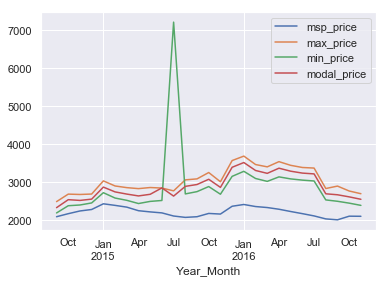

In [114]:
Monthly_data_2.dropna().groupby(level = 0)[[ 'msp_price', 'max_price', 'min_price', 'modal_price']].agg('mean').plot()

### For Deseasonlize: 

    ##### we will take 3 months data, then will deseasonlize the max_price, min_price , modal_price by taking the average values and also by removing the trend.



### Comparison of msp_price and deseasonalized price for max_price, min_price and modal_price.
### Graph without the shifting 

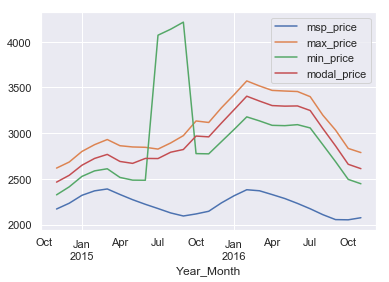

In [115]:
ax = Monthly_data_2.dropna().groupby(level = 0)[[ 'msp_price', 'max_price', 'min_price', 'modal_price']].agg('mean').rolling(window = 3).agg('mean').plot()

### After shifting and differencing , we get the deseasonalized plot

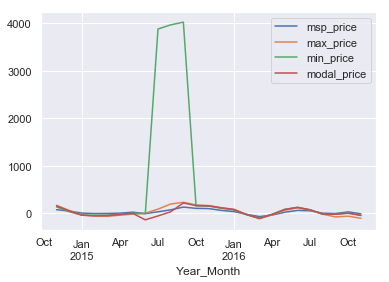

In [116]:
ax = (Monthly_data_2[['max_price', 'min_price', 'modal_price', 'msp_price']] - Monthly_data_2[['max_price', 'min_price', 'modal_price', 'msp_price']].shift()).dropna().groupby(level = 0)[[ 'msp_price', 'max_price', 'min_price', 'modal_price']].agg('mean').rolling(window = 3).agg('mean').plot()

# Objective 4:
### Flag set of APMC/mandis and commodities with highest price fluctuation across different commodities in each relevant season, and year.

### For flagging set of APMC and commodities we can use moving average! Rolling window, which will give the mean for k number of values , where k is the window size. I am selecting window size below 25 percentile, so as to be able to show the fluctuations in even small mandis with lesser crops and months of sale

In [117]:
Monthly_data_2.groupby('APMC')['max_price'].agg(['count', 'mean']).describe() # Will take k - below 36 which is the 25th percentile

,count,mean
count,349.000000,349.000000
mean,178.879656,3827.137521
std,226.546784,2425.335745
min,1.000000,309.132075
25%,36.000000,2815.263158
50%,116.000000,3610.172043
75%,216.000000,4394.803571
max,1538.000000,28704.000000


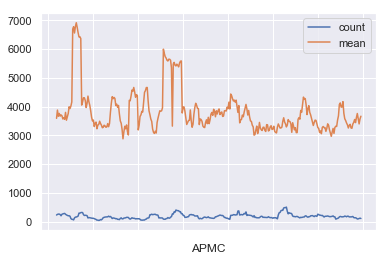

In [118]:
Monthly_data_2.groupby('APMC')['max_price'].agg(['count', 'mean']).rolling(window = 10).agg('mean').plot()

The brown curve above helps us to identify which APMCs have hight and low fluctuations in prices.

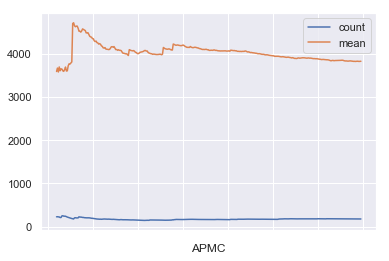

In [119]:
Monthly_data_2.groupby('APMC')['max_price'].agg(['count', 'mean']).expanding(min_periods = 10).agg('mean').plot()

### For commodities : window size of  5, below 25%

In [120]:
Monthly_data_2.groupby('Commodity')['max_price'].agg('count').describe()

count     204.000000
mean      306.024510
std       686.645286
min         1.000000
25%        12.750000
50%        59.500000
75%       248.500000
max      4115.000000
Name: max_price, dtype: float64

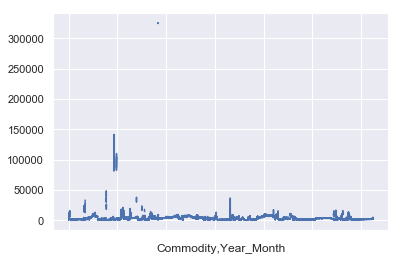

In [121]:
Monthly_data_2.groupby('Commodity')['max_price'].rolling(window = 5).agg('mean').plot()